In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rand 
from numba import jit, objmode
from scipy.stats import geom, expon 


In [2]:
@jit
def hat_numbers(n):
    hat = list(range(1,n+1))
    l = len(hat)
    #print(hat)
    while l > 1:
        x_index = int(l*rand.random())
        y_index = int(l*rand.random())
        while y_index == x_index:
            y_index = int(l*rand.random())
        x,y = hat[x_index],hat[y_index]
        z = np.abs(x-y)
        #print(f'x,y = {x},{y}')
        #print(f'z = {z}')
        hat.remove(x)
        hat.remove(y)
        hat.append(z)
        #print(hat)
        l = len(hat)
        #print(l)
    return hat[0]
    

In [3]:
trial = hat_numbers(5)
print(trial)

1


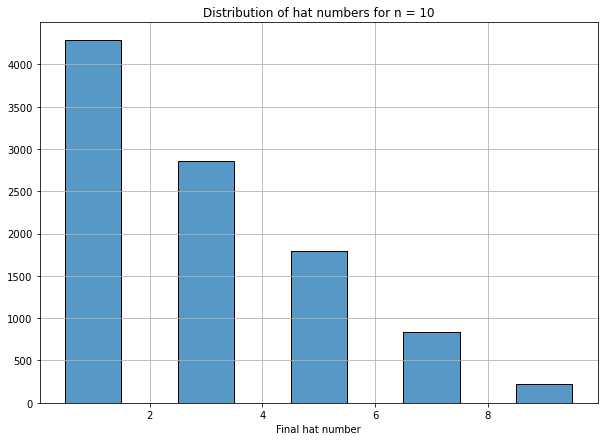

In [4]:
trials = int(1e4)
n0 = 10
final_number = []

for i in range(trials):
    x = hat_numbers(n0)
    final_number.append(x)

fig,ax = plt.subplots(1,1,figsize = (10,7))
sns.histplot(final_number, bins=n0+1, stat = 'count', ax=ax,  discrete = True)
ax.set_title(f'Distribution of hat numbers for n = {n0}') 
x2 = np.linspace(min(final_number), max(final_number))
ax.set_ylabel('')
ax.set_xlabel('Final hat number')

ax.grid('on')

plt.show()

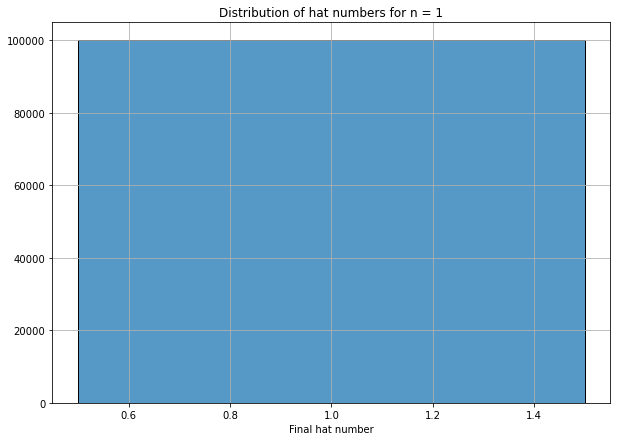

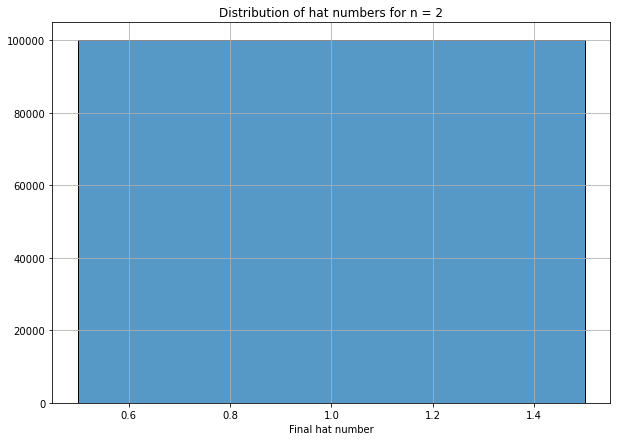

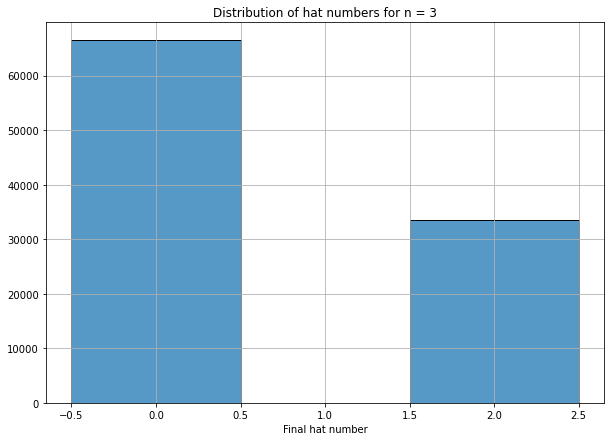

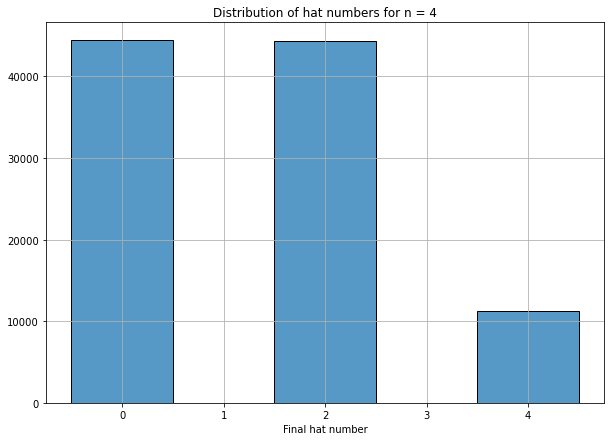

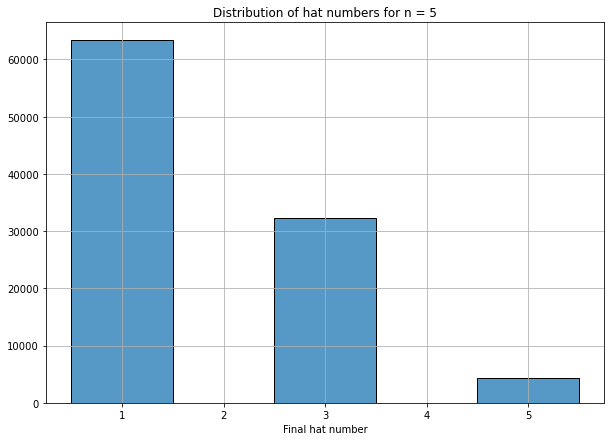

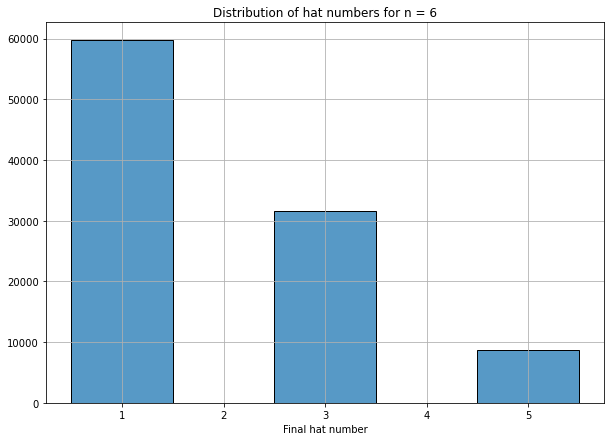

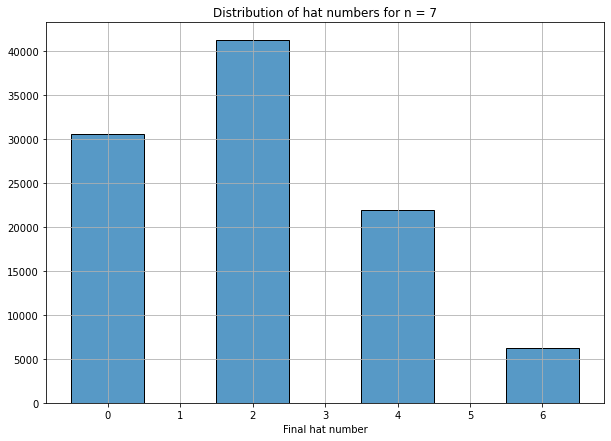

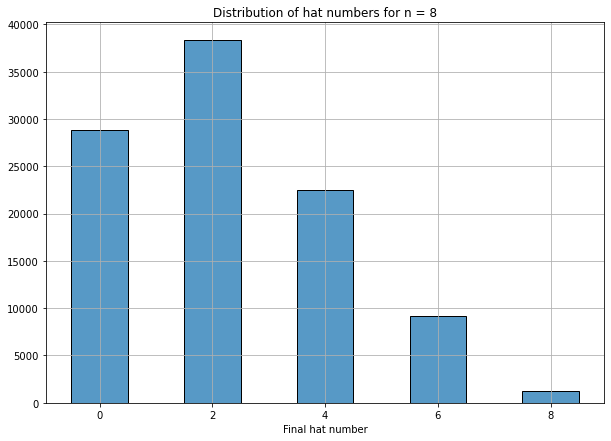

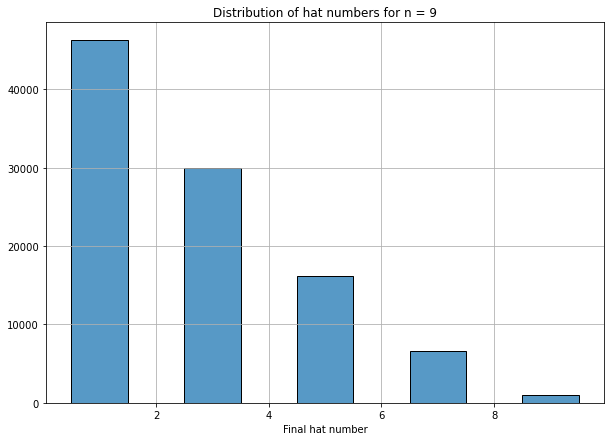

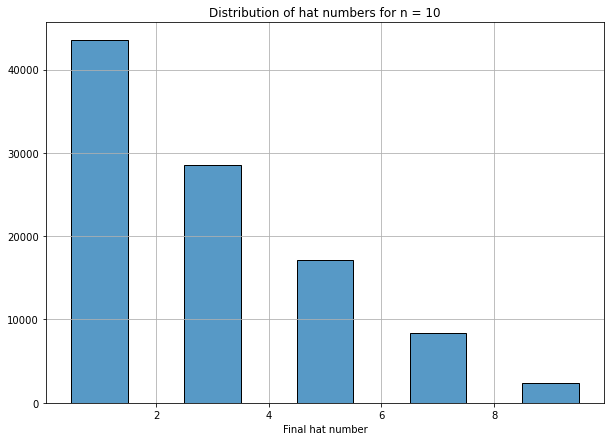

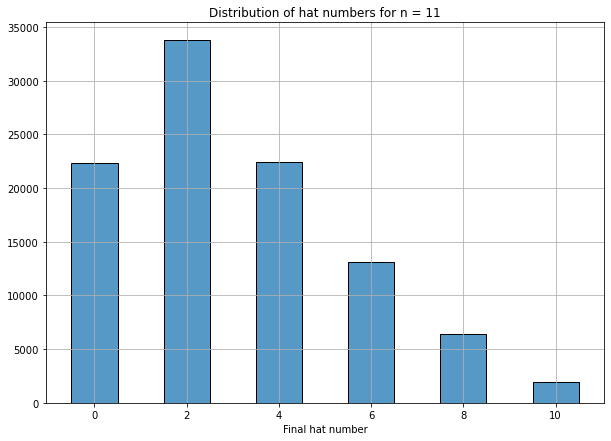

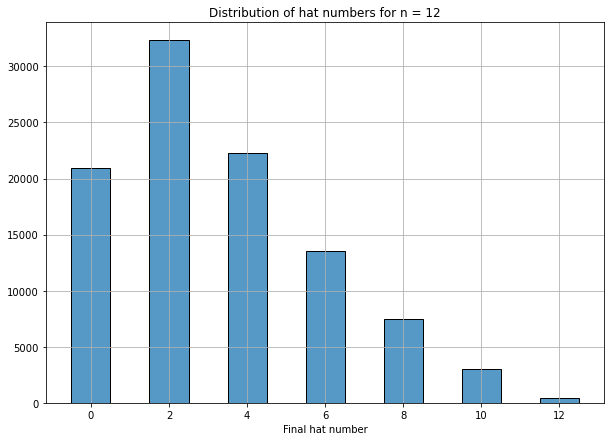

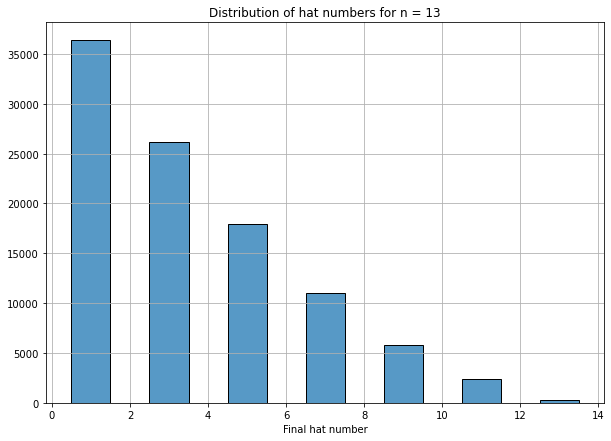

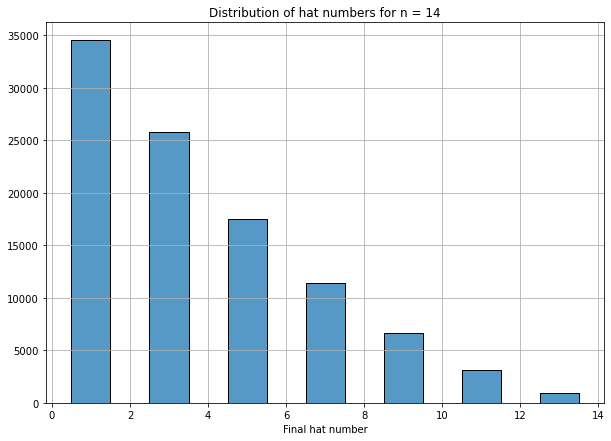

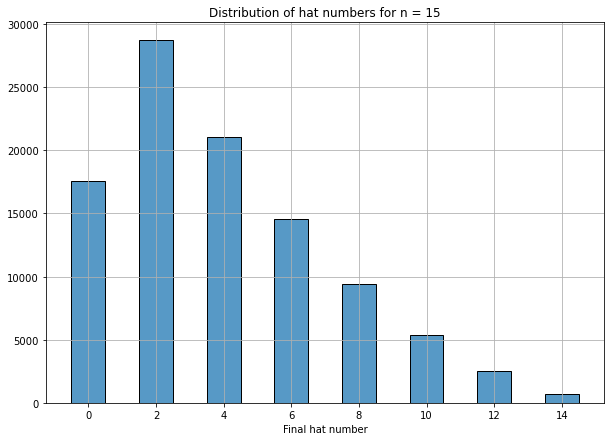

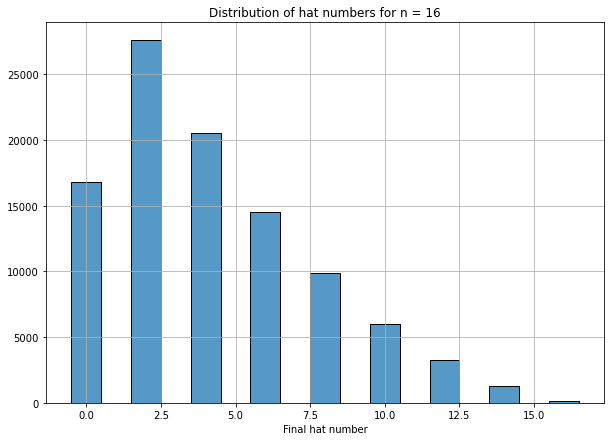

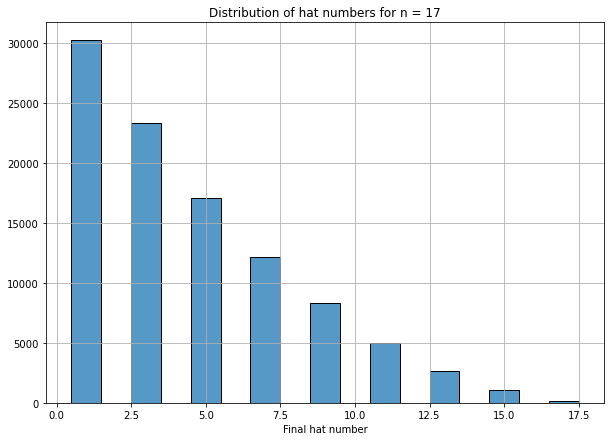

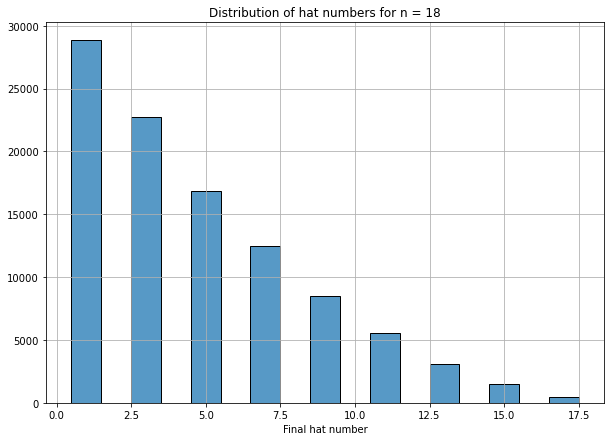

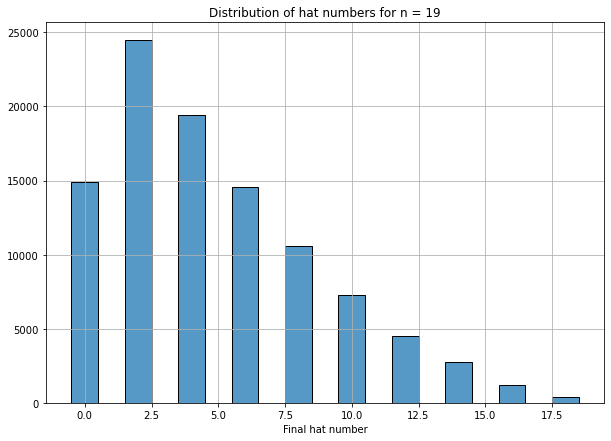

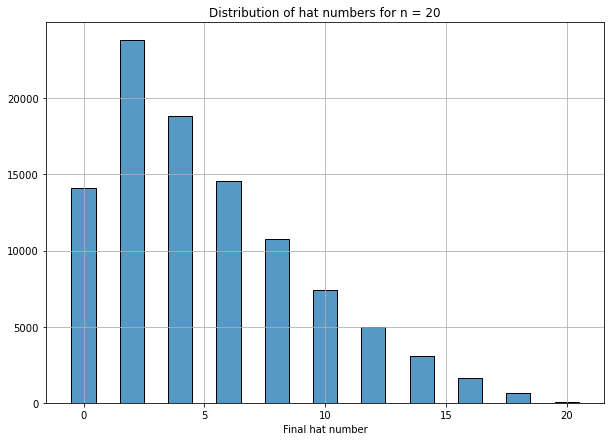

In [5]:
trials = int(1e5)
n_max = 20
#rows = 5
#columns = 4

ratio = []
position = []

for n in range(1,n_max+1):  
    n0 = n
    final_number = []

    for i in range(trials):
        x = hat_numbers(n0)
        final_number.append(x)
    
    fig,ax = plt.subplots(1,1,figsize = (10,7))
    sns.histplot(final_number, bins=n0+1, stat = 'count', ax=ax,  discrete = True)
    ax.set_title(f'Distribution of hat numbers for n = {n0}') 
    x2 = np.linspace(min(final_number), max(final_number))
    ax.set_ylabel('')
    ax.set_xlabel('Final hat number')

    ax.grid('on')

    plt.show()
    
    if (n % 4 == 0) or (n % 4 == 3):
        bins = np.arange(0,n0+2)-0.5
        count_data,_ = np.histogram(final_number,bins=bins)
        ratio.append(count_data[0]/count_data[2])
        position.append(n)
        #print(f'ratio of 0 data to 2 data is {ratio}')

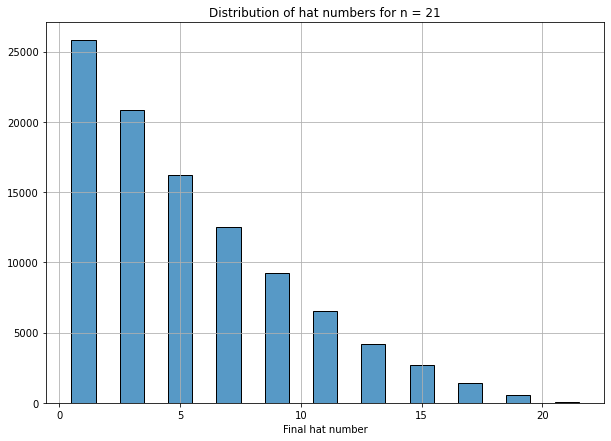

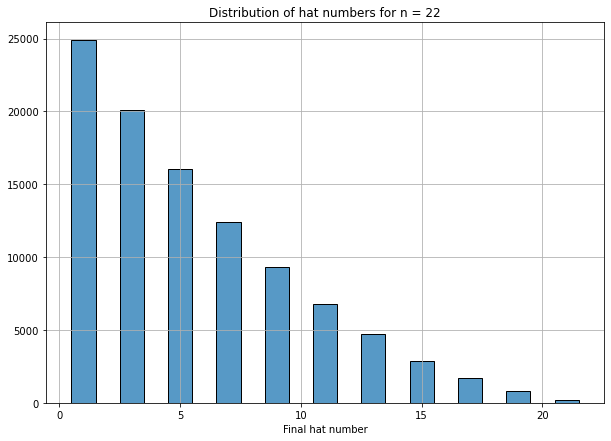

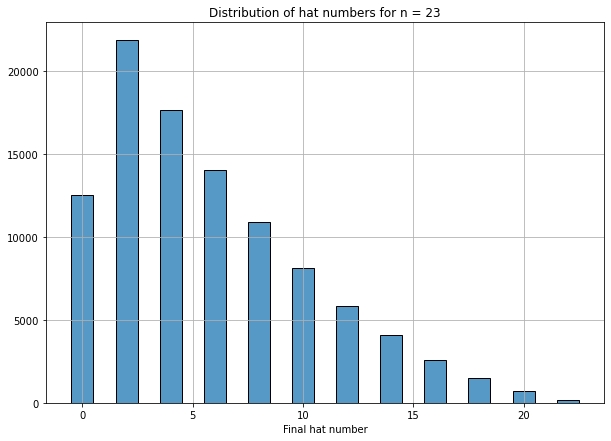

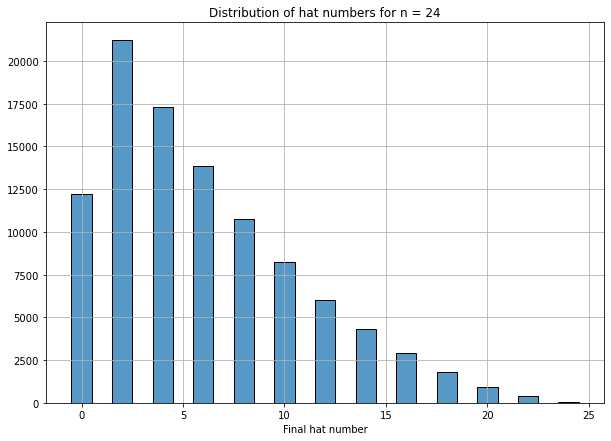

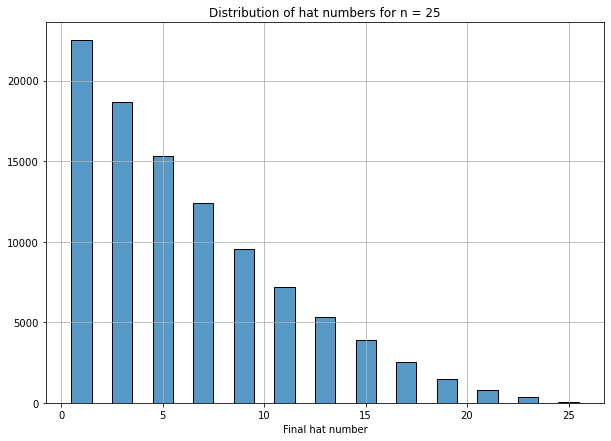

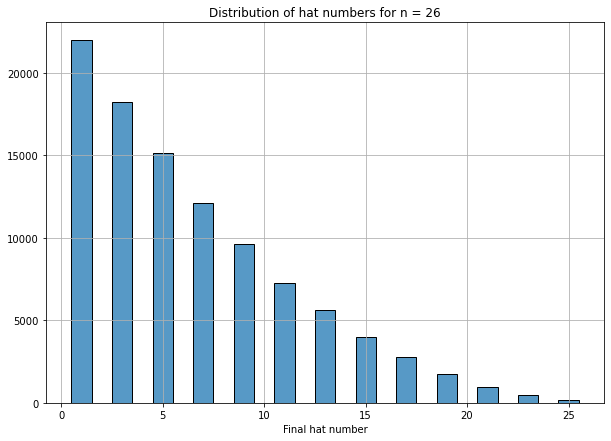

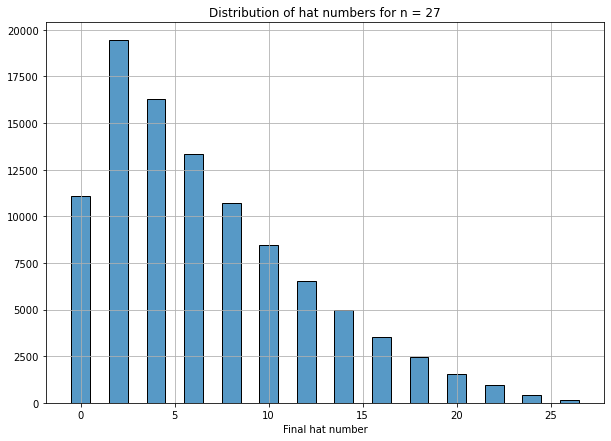

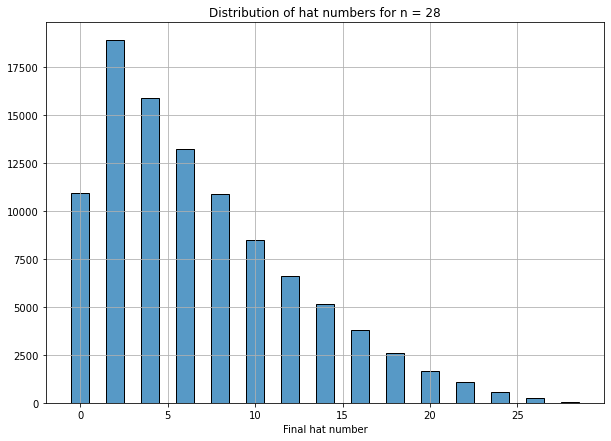

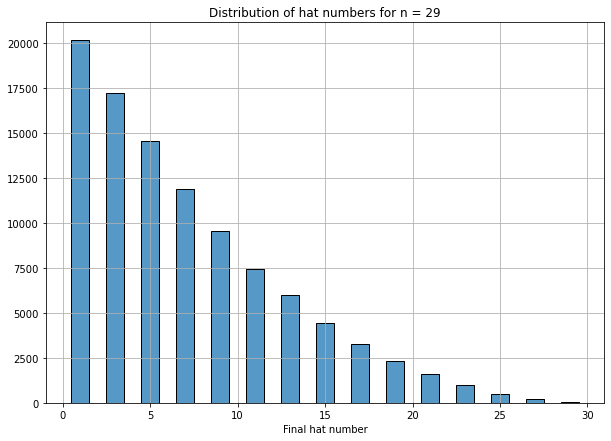

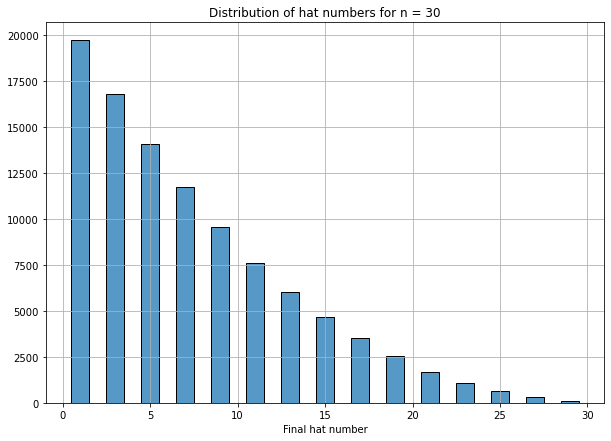

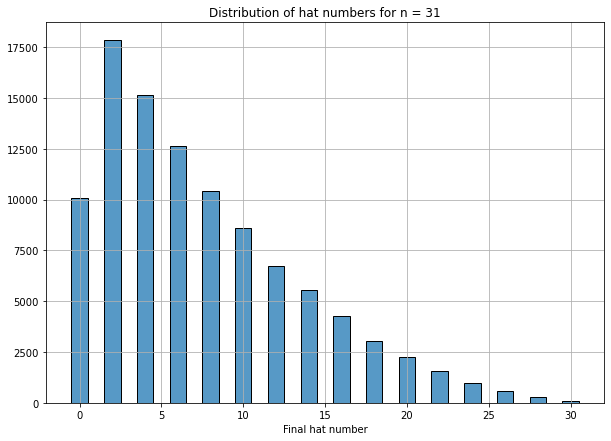

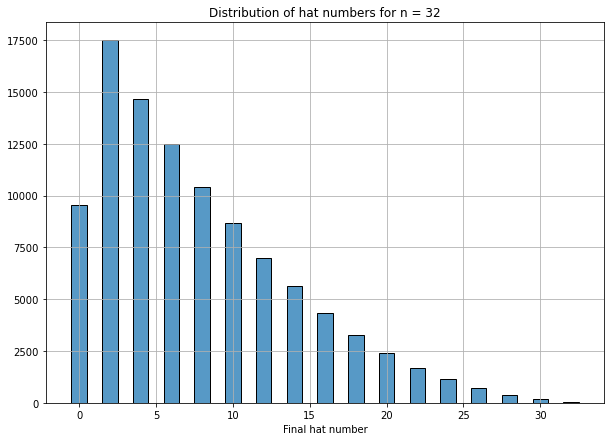

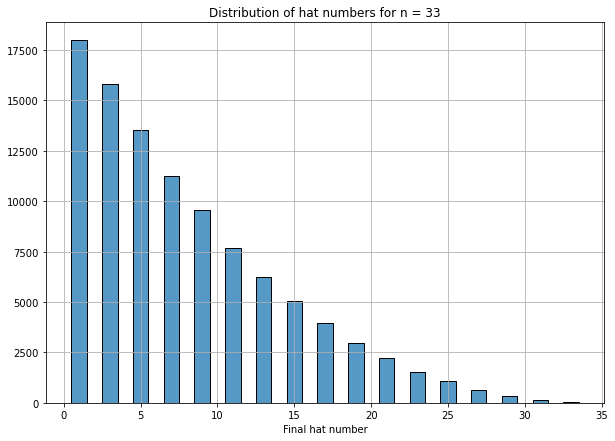

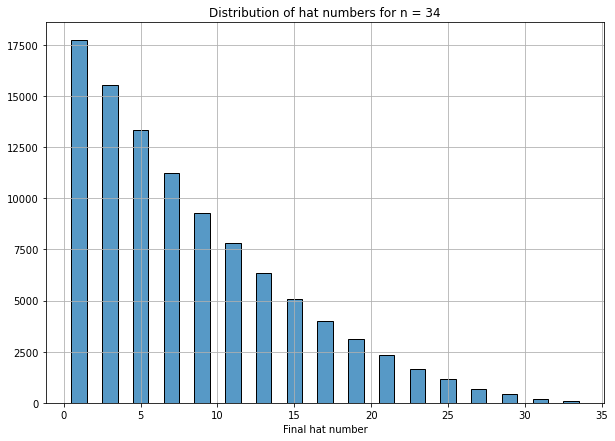

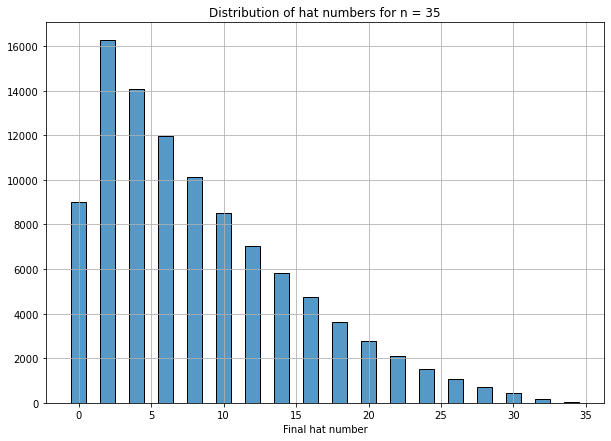

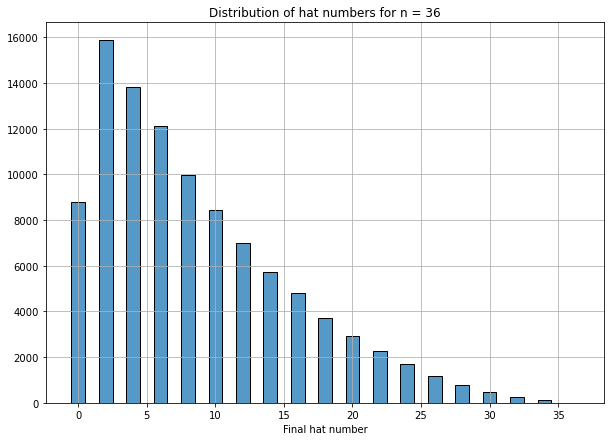

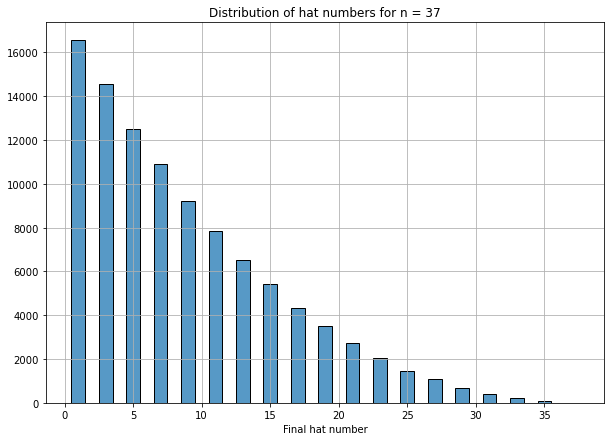

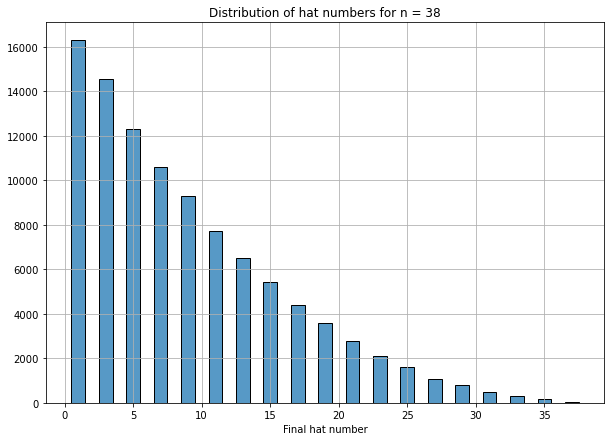

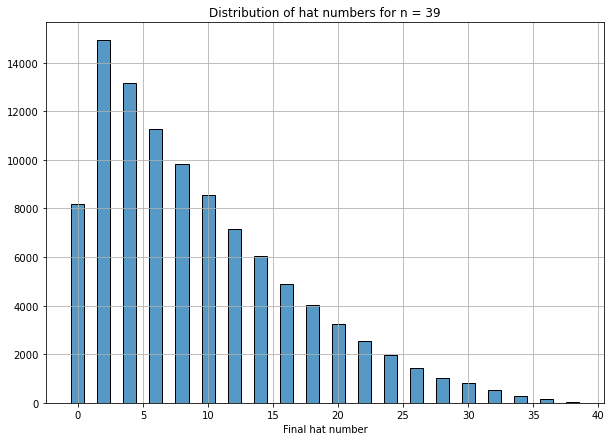

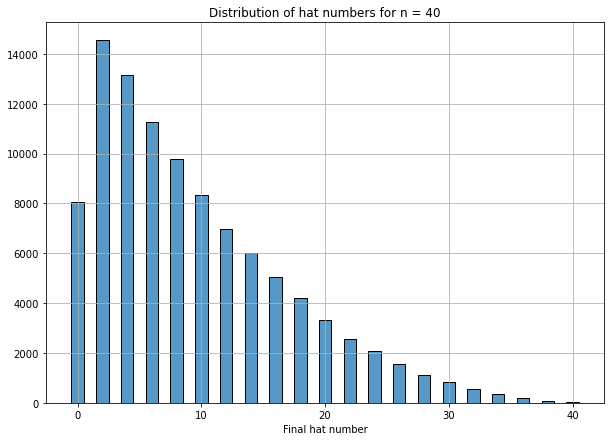

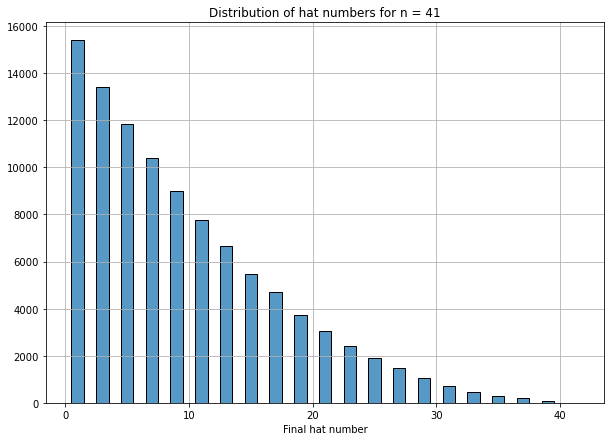

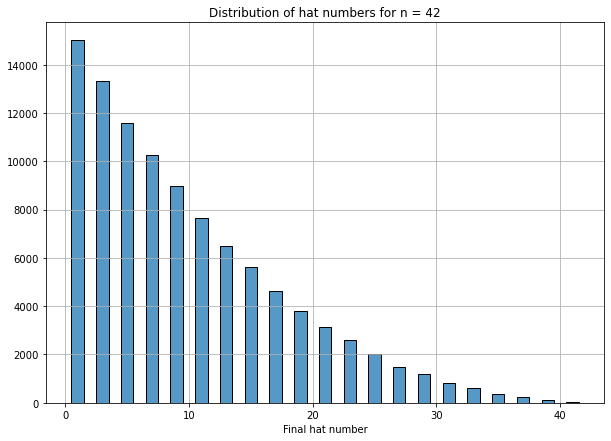

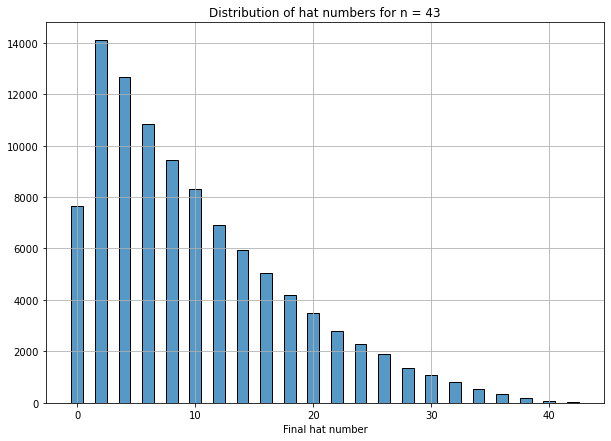

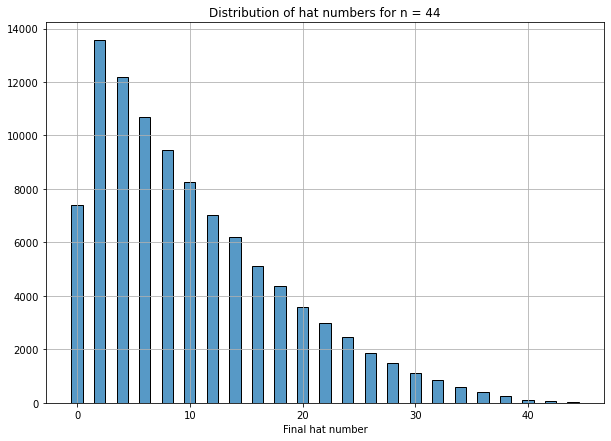

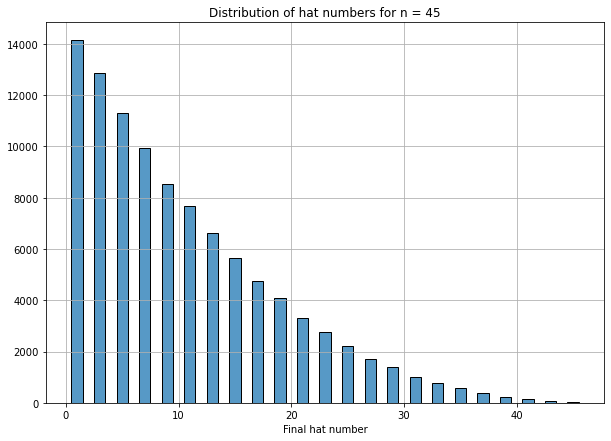

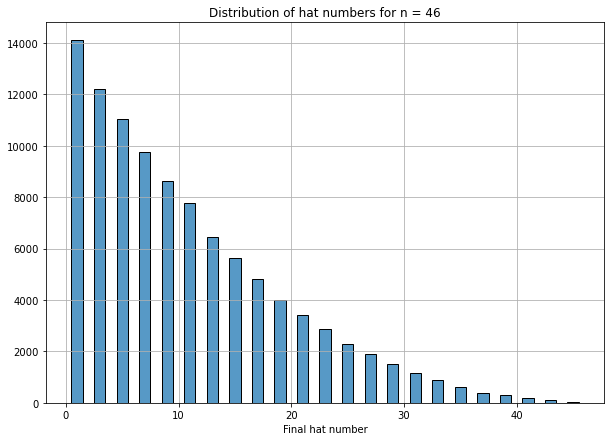

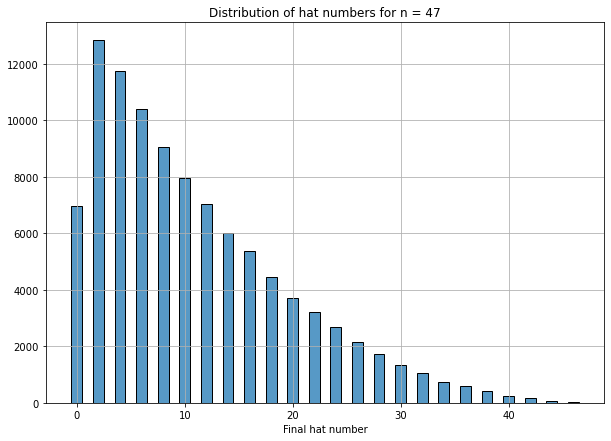

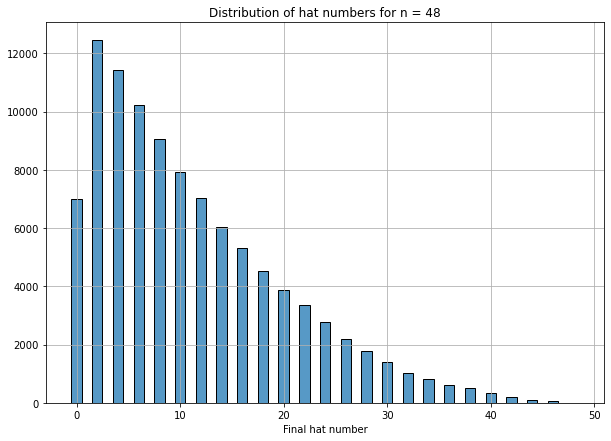

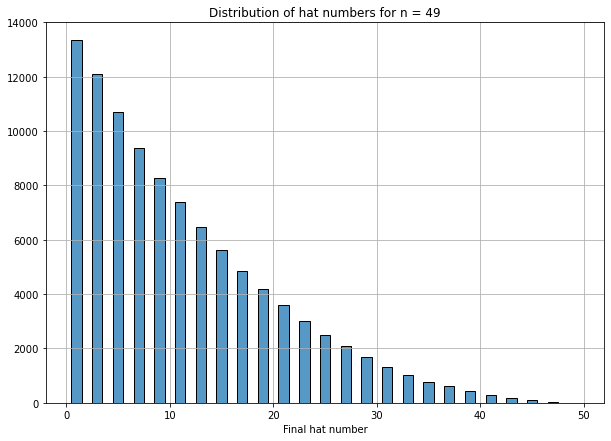

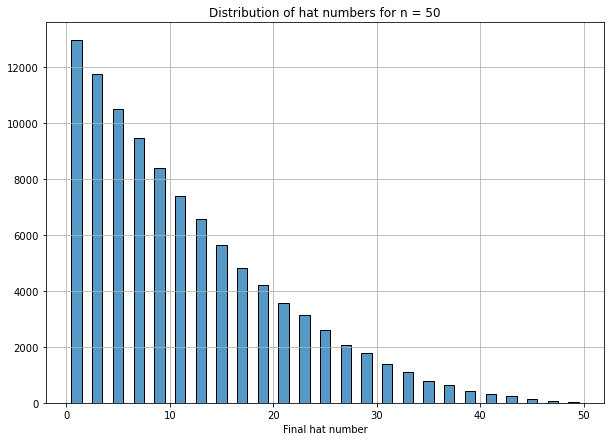

In [6]:
trials = int(1e5)
n_min = 21
n_max = 50
#rows = 5
#columns = 4
for n in range(n_min,n_max+1):  
    n0 = n
    final_number = []

    for i in range(trials):
        x = hat_numbers(n0)
        final_number.append(x)
    
    fig,ax = plt.subplots(1,1,figsize = (10,7))
    sns.histplot(final_number, bins=n0+1, stat = 'count', ax=ax,  discrete = True)
    ax.set_title(f'Distribution of hat numbers for n = {n0}') 
    x2 = np.linspace(min(final_number), max(final_number))
    ax.set_ylabel('')
    ax.set_xlabel('Final hat number')

    ax.grid('on')

    plt.show()
    
    if (n % 4 == 0) or (n % 4 == 3):
        bins = np.arange(0,n0+2)-0.5
        count_data,_ = np.histogram(final_number,bins=bins)
        ratio.append(count_data[0]/count_data[2])
        position.append(n)
        #print(f'ratio of 0 data to 2 data is {ratio}')

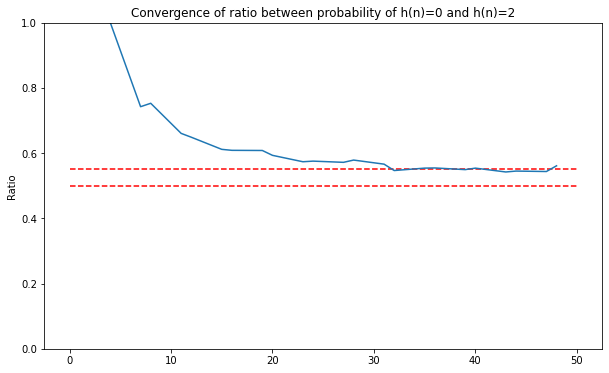

In [11]:
plt.figure(1,figsize=(10,6))

plt.plot(position, ratio)
plt.hlines(0.55,0, 50, linestyles='dashed', color = 'red')
plt.hlines(0.5,0, 50, linestyles='dashed', color = 'red')

plt.ylim(0,1)
plt.ylabel('Ratio')
plt.title('Convergence of ratio between probability of h(n)=0 and h(n)=2')

plt.show()

## A couple of extra larger cases ##

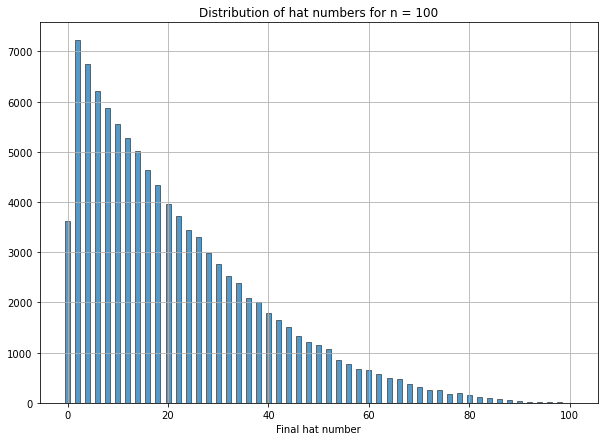

ratio of 0 data to 2 data is 0.5016620498614959


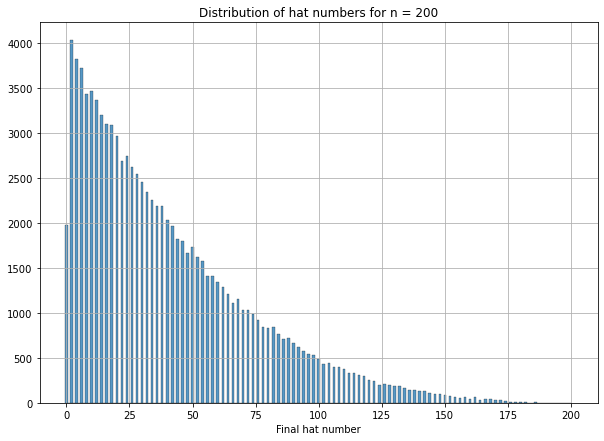

ratio of 0 data to 2 data is 0.4908234126984127


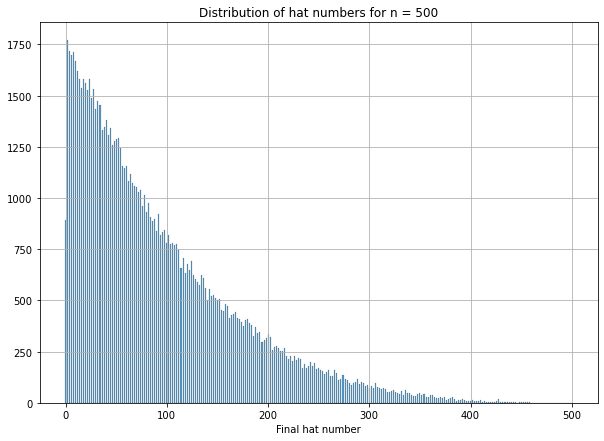

ratio of 0 data to 2 data is 0.503954802259887


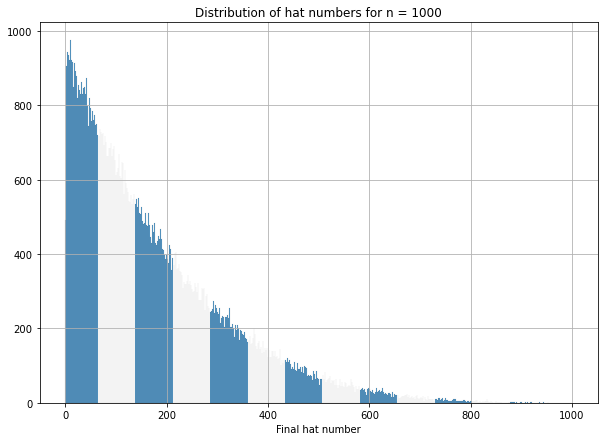

ratio of 0 data to 2 data is 0.5413450937155457


In [8]:
trials = int(1e5)
n0_test = [100, 200, 500, 1000]
#rows = 5
#columns = 4
for m in n0_test:
    final_number_test = []
    bins_100 = np.arange(0,m+2)-0.5

    for i in range(trials):
        x = hat_numbers(m)
        final_number_test.append(x)
    
    fig,ax = plt.subplots(1,1,figsize = (10,7))
    sns.histplot(final_number_test, bins=bins_100, stat = 'count', ax=ax)
    ax.set_title(f'Distribution of hat numbers for n = {m}') 
    x2 = np.linspace(min(final_number_test), max(final_number_test))
    ax.set_ylabel('')
    ax.set_xlabel('Final hat number')

    ax.grid('on')

    plt.show()
    
    if (m % 4 == 0) or (m % 4 == 3):
        count_data,_ = np.histogram(final_number_test,bins=bins_100)
        ratio_higher_n = count_data[0]/count_data[2]
        print(f'ratio of 0 data to 2 data is {ratio_higher_n}')